<a href="https://colab.research.google.com/github/kalinharikumar/E-commerce-Customer-Segmentation/blob/main/Ecom_cus_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**E-commerce Customer Segmentation**

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go
import plotly.express as px

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

#import warnings
#warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/cust_data.xlsx')
df=data.copy()
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


# **EDA**

In [ ]:
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [ ]:
#filling NaN in gender column
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df.isna().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [ ]:
#label encoding gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
  print(df['Gender'].unique())
  df['Gender'] = le.fit_transform(df['Gender'])
  print(df['Gender'].unique())

['M' 'F']
[1 0]


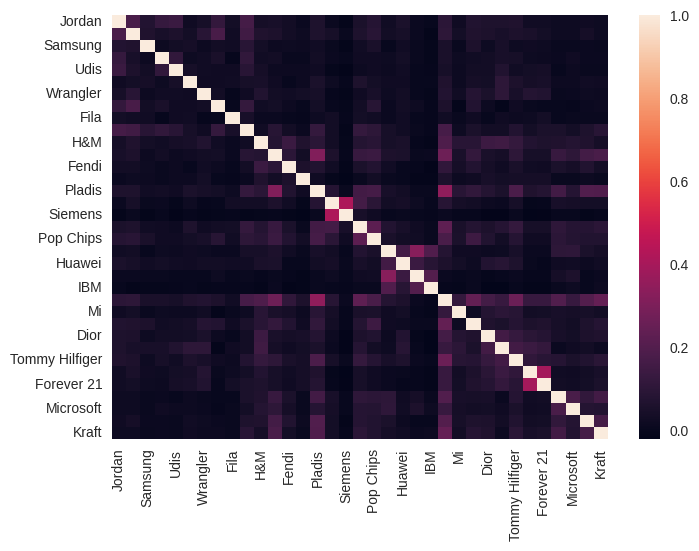

In [ ]:
plt.figure()
sns.heatmap(df.iloc[:,3: ].corr())
plt.show()

# **Clustering**

## grouping the customers by number of orders

In [ ]:
df1=df.copy()

In [ ]:
#Silhouette analysis
x=df1.iloc[:,2:3].values
silhouette_avg = []
for n in range(2,5):
  cluster_labels=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  cluster_labels=cluster_labels.fit_predict(x)
  silhouette_avg.append(silhouette_score(x,cluster_labels))

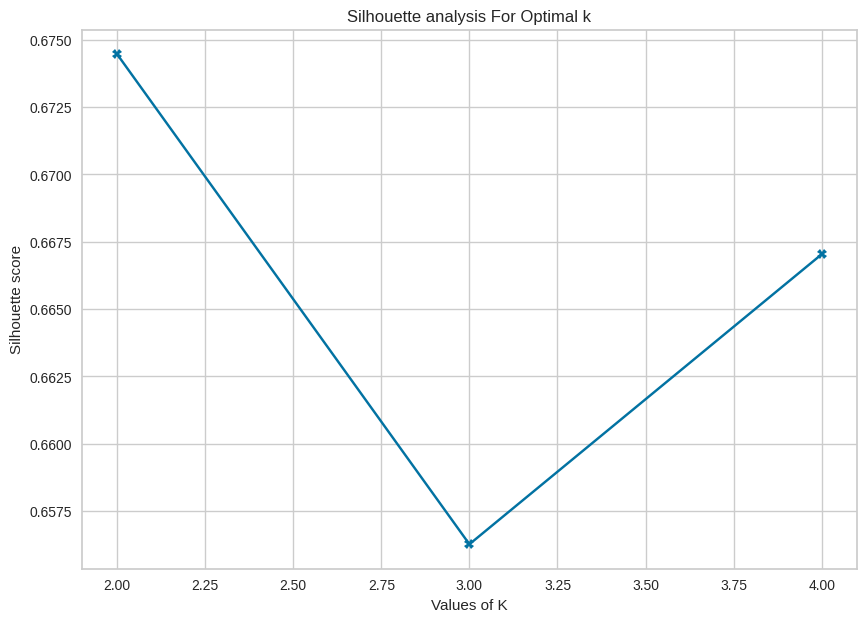

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(2,5),silhouette_avg,'bX-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
x=df1.iloc[:,2:3].values
algorithm=(KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=100,algorithm='elkan'))
algorithm.fit(x)
labels=algorithm.labels_
centroids=algorithm.cluster_centers_

y_kmeans=algorithm.fit_predict(x)
df1['cust_cat']=pd.DataFrame(y_kmeans)

In [ ]:
df1=df1.drop(df1.loc[:, 'Jordan':'Kraft'].columns, axis=1)
df1.head()

,Cust_ID,Gender,Orders,cust_cat
0,1,1,7,1
1,2,0,0,2
2,3,1,7,1
3,4,0,0,2
4,5,0,10,1


In [ ]:
d=df1.groupby(['cust_cat'])
min=d['Orders'].min()
min

cust_cat
0    3
1    7
2    0
Name: Orders, dtype: int64

In [ ]:
d=df1.groupby(['cust_cat'])
max=d['Orders'].max()
max

cust_cat
0     6
1    12
2     2
Name: Orders, dtype: int64

In [ ]:
df1.groupby(['cust_cat'])['cust_cat'].count()

cust_cat
0     8440
1     9128
2    12432
Name: cust_cat, dtype: int64


## Conclusion for customers category from previous orders:


*   cluster 0: order range from 3 to 6    **"Average/Normal customer"**-give festive offers and discounts, over festive periods
*   cluster 1: orders range from 7 to 12  **"Privilege cutomer"**-show recomendations,and make offers and discounts everytime.as they visit and purchase more often.
*   cluster 2: orders range from 0 to 2     **"New/rare customer"**-focus on marketing trendy products, to make them see products with max discounts and offers.



*   0 Average/Normal customer    8440
*   1 Privilege cutomer    9128
*   2 New/rare customer   12432


## grouping the customers by mostly searched brands

In [ ]:
df2=df.copy()

In [ ]:
#Silhouette analysis
x=df2.iloc[:,3:].values
silhouette_avg = []
for n in range(2,10):
  cluster_labels=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  cluster_labels=cluster_labels.fit_predict(x)
  silhouette_avg.append(silhouette_score(x,cluster_labels))

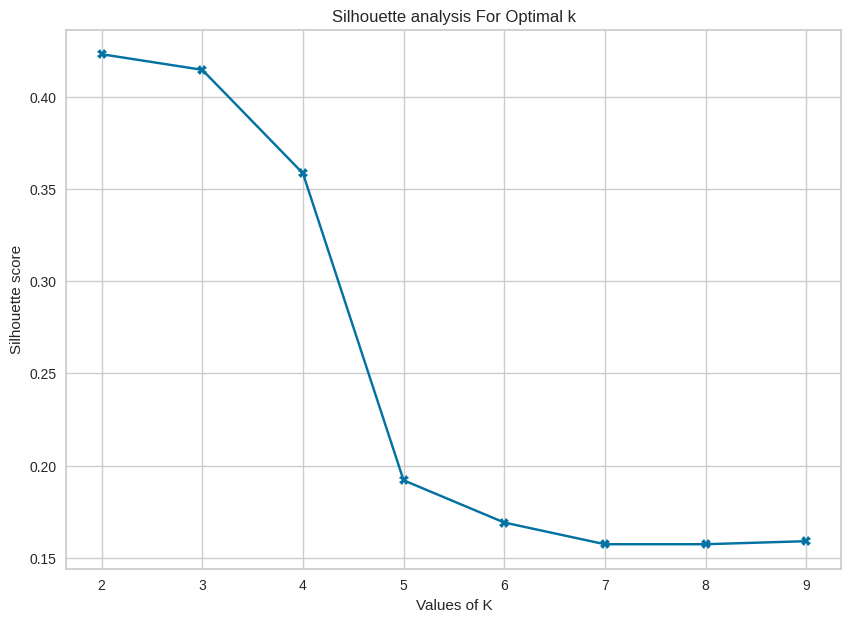

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(2,10),silhouette_avg,'bX-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
x=df2.iloc[:,3:].values
inertia=[]
for n in range(1,10):
  algorithm=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  algorithm.fit(x)
  inertia.append(algorithm.inertia_)

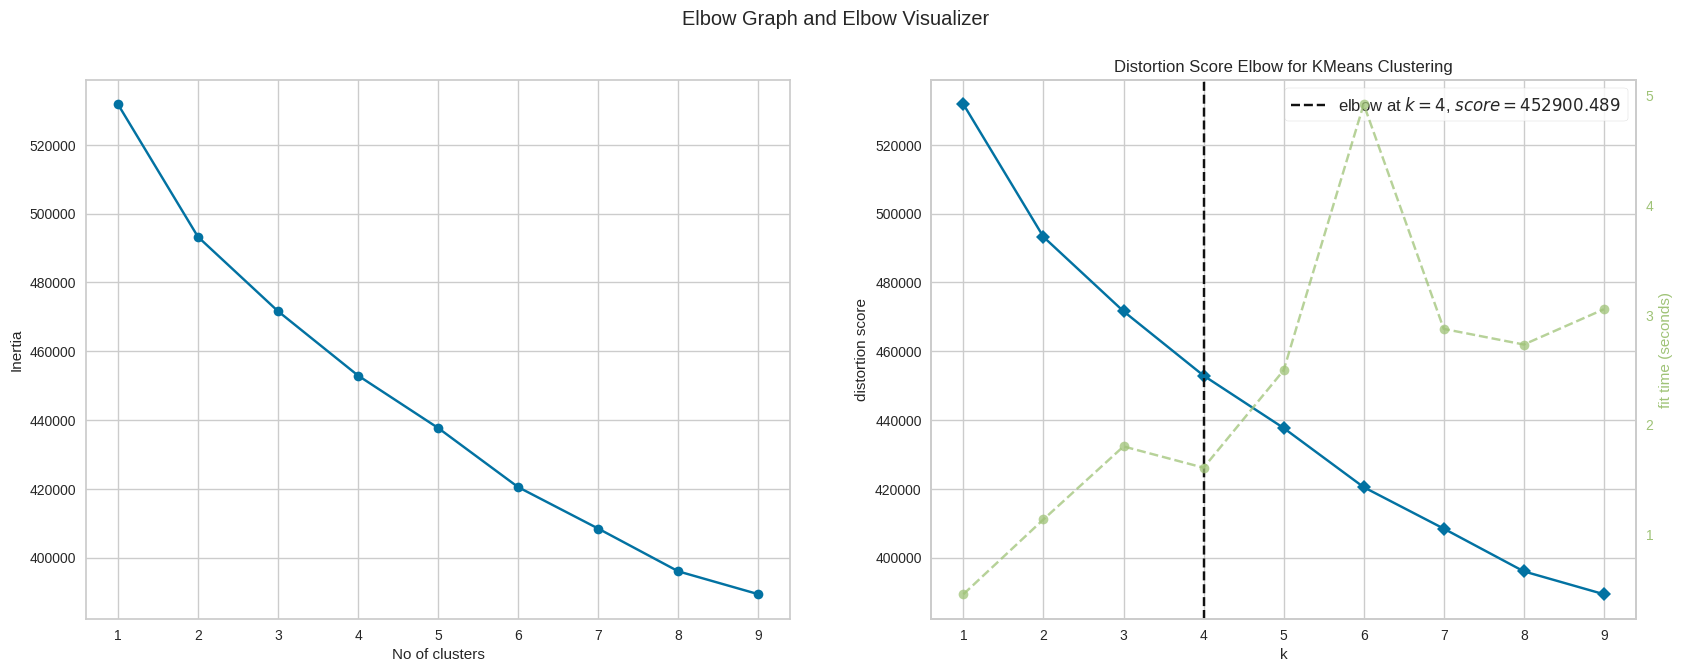

In [ ]:
#elbow graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,10), inertia, 'bo-')
plt.xlabel('No of clusters'), plt.ylabel('Inertia')

#elbow visualizer
plt.subplot(1,2,2)
visualize = KElbowVisualizer(algorithm,k=(1,10))
visualize.fit(x)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()

In [ ]:
algorithm=(KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=100,algorithm='elkan'))
algorithm.fit(x)
labels=algorithm.labels_
centroids=algorithm.cluster_centers_

y_kmeans=algorithm.fit_predict(x)
df2['brands_search_cat']=pd.DataFrame(y_kmeans)
df2=df2.drop(['Cust_ID','Gender','Orders'],axis=1)
df2.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,brands_search_cat
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,2


In [ ]:
df2.groupby(['brands_search_cat'])['brands_search_cat'].count()

brands_search_cat
0    25987
1      910
2     2000
3     1103
Name: brands_search_cat, dtype: int64

In [ ]:
cat = df2.groupby(['brands_search_cat'],as_index=False).sum()
cat=cat.set_index(['brands_search_cat'])
cat

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
brands_search_cat,,,,,,,,,,,,,,,,,,,,,
0,6178,5858,5290,3872,3465,3306,2528,2575,2261,3061,...,1771,6070,8932,3182,1802,1286,3749,2431,1707,1149
1,225,287,191,194,100,134,59,72,137,111,...,64,205,310,145,33,23,199,147,61,47
2,1308,1112,966,569,559,575,490,561,324,842,...,1123,1564,1423,1216,434,362,1376,619,746,850
3,312,313,241,205,182,178,131,135,106,190,...,118,295,437,226,61,49,442,294,127,81


In [ ]:
c=pd.DataFrame(cat.T)
c.reset_index(inplace=True)
c = c.rename(columns = {'index':'brands'})
c

brands_search_cat,brands,0,1,2,3
0,Jordan,6178,225,1308,312
1,Gatorade,5858,287,1112,313
2,Samsung,5290,191,966,241
3,Asus,3872,194,569,205
4,Udis,3465,100,559,182
5,Mondelez International,3306,134,575,178
6,Wrangler,2528,59,490,131
7,Vans,2575,72,561,135
8,Fila,2261,137,324,106
9,Brooks,3061,111,842,190


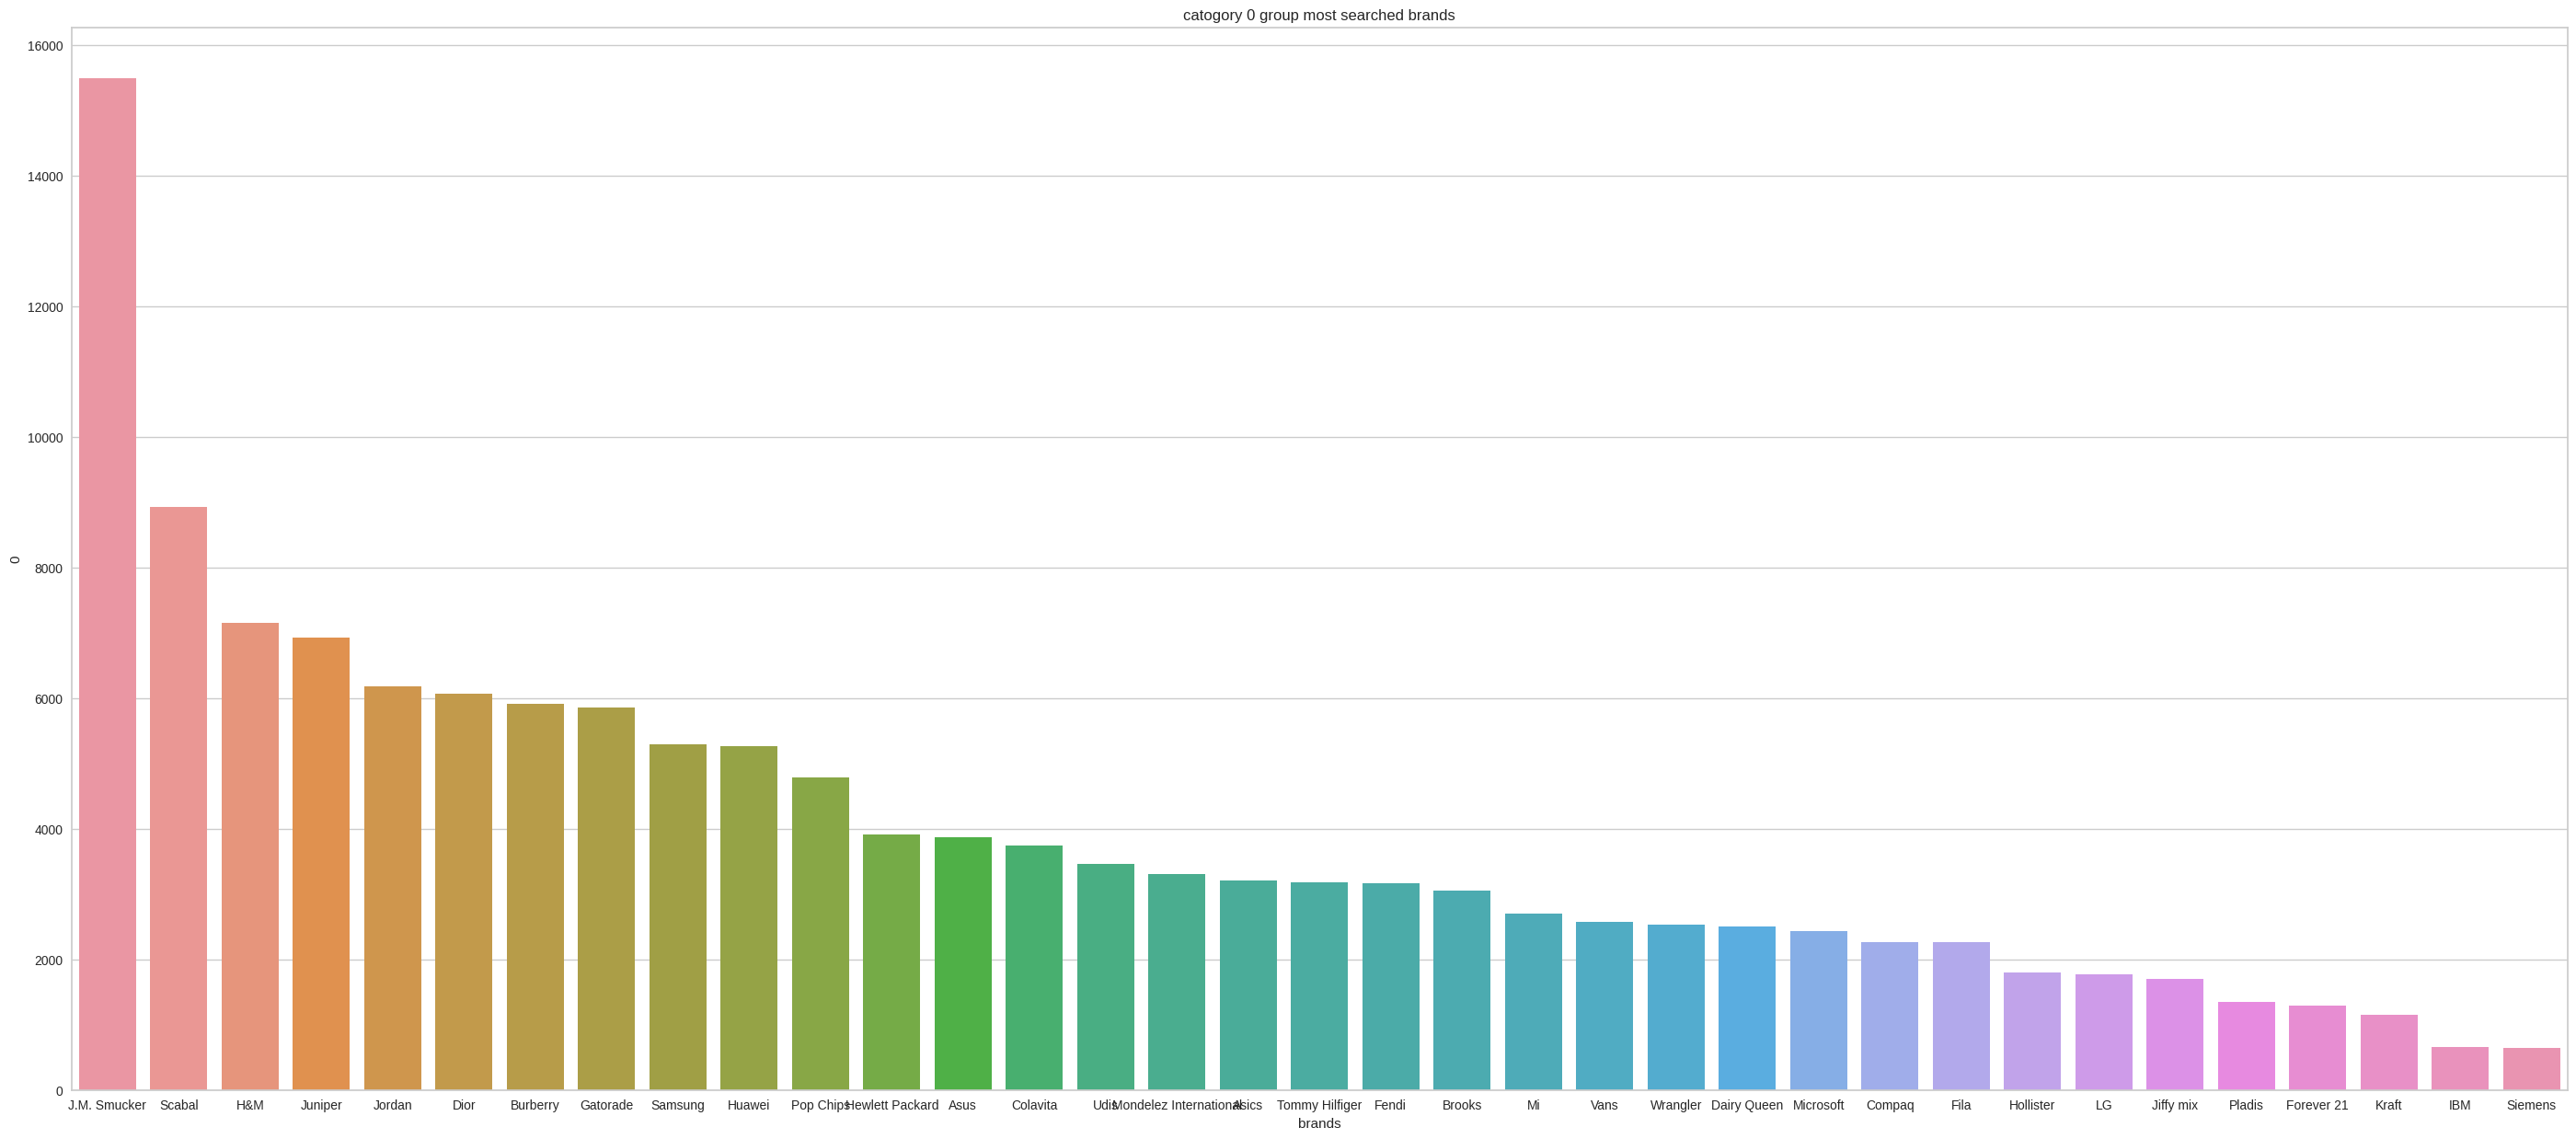

In [ ]:
plt.figure(figsize=(35,15))
sns.barplot(data=c,
            x='brands',
            y=0,
            order=c.sort_values(0,ascending = False).brands)
plt.title("catogory 0 group most searched brands")
plt.show()

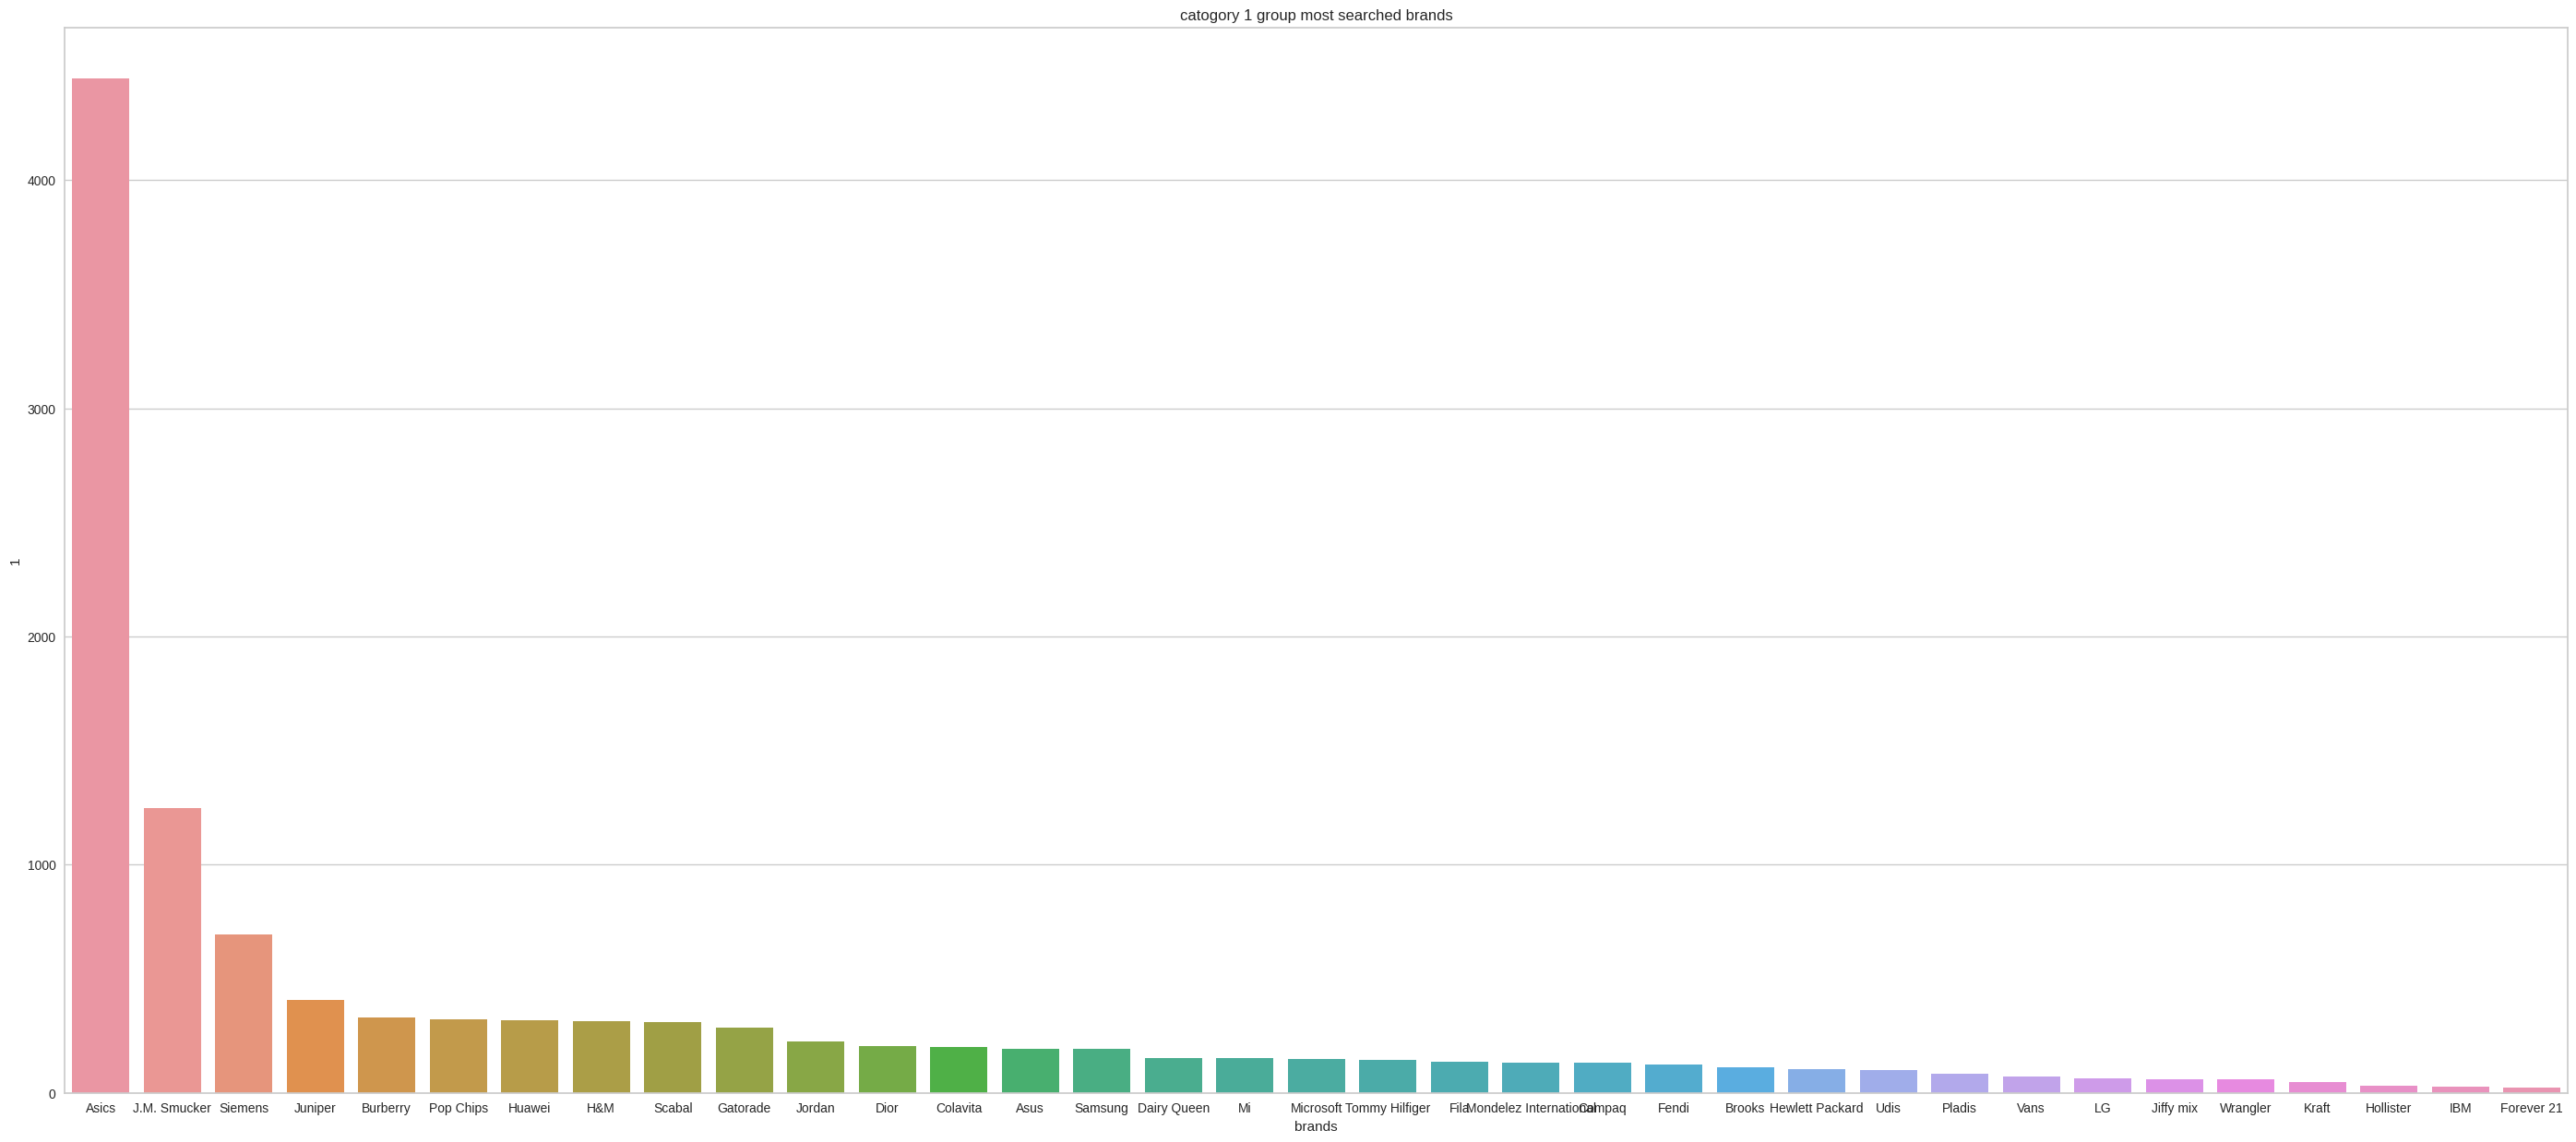

In [ ]:
plt.figure(figsize=(35,15))
sns.barplot(data=c,
            x='brands',
            y=1,
            order=c.sort_values(1,ascending = False).brands)
plt.title("catogory 1 group most searched brands")
plt.show()

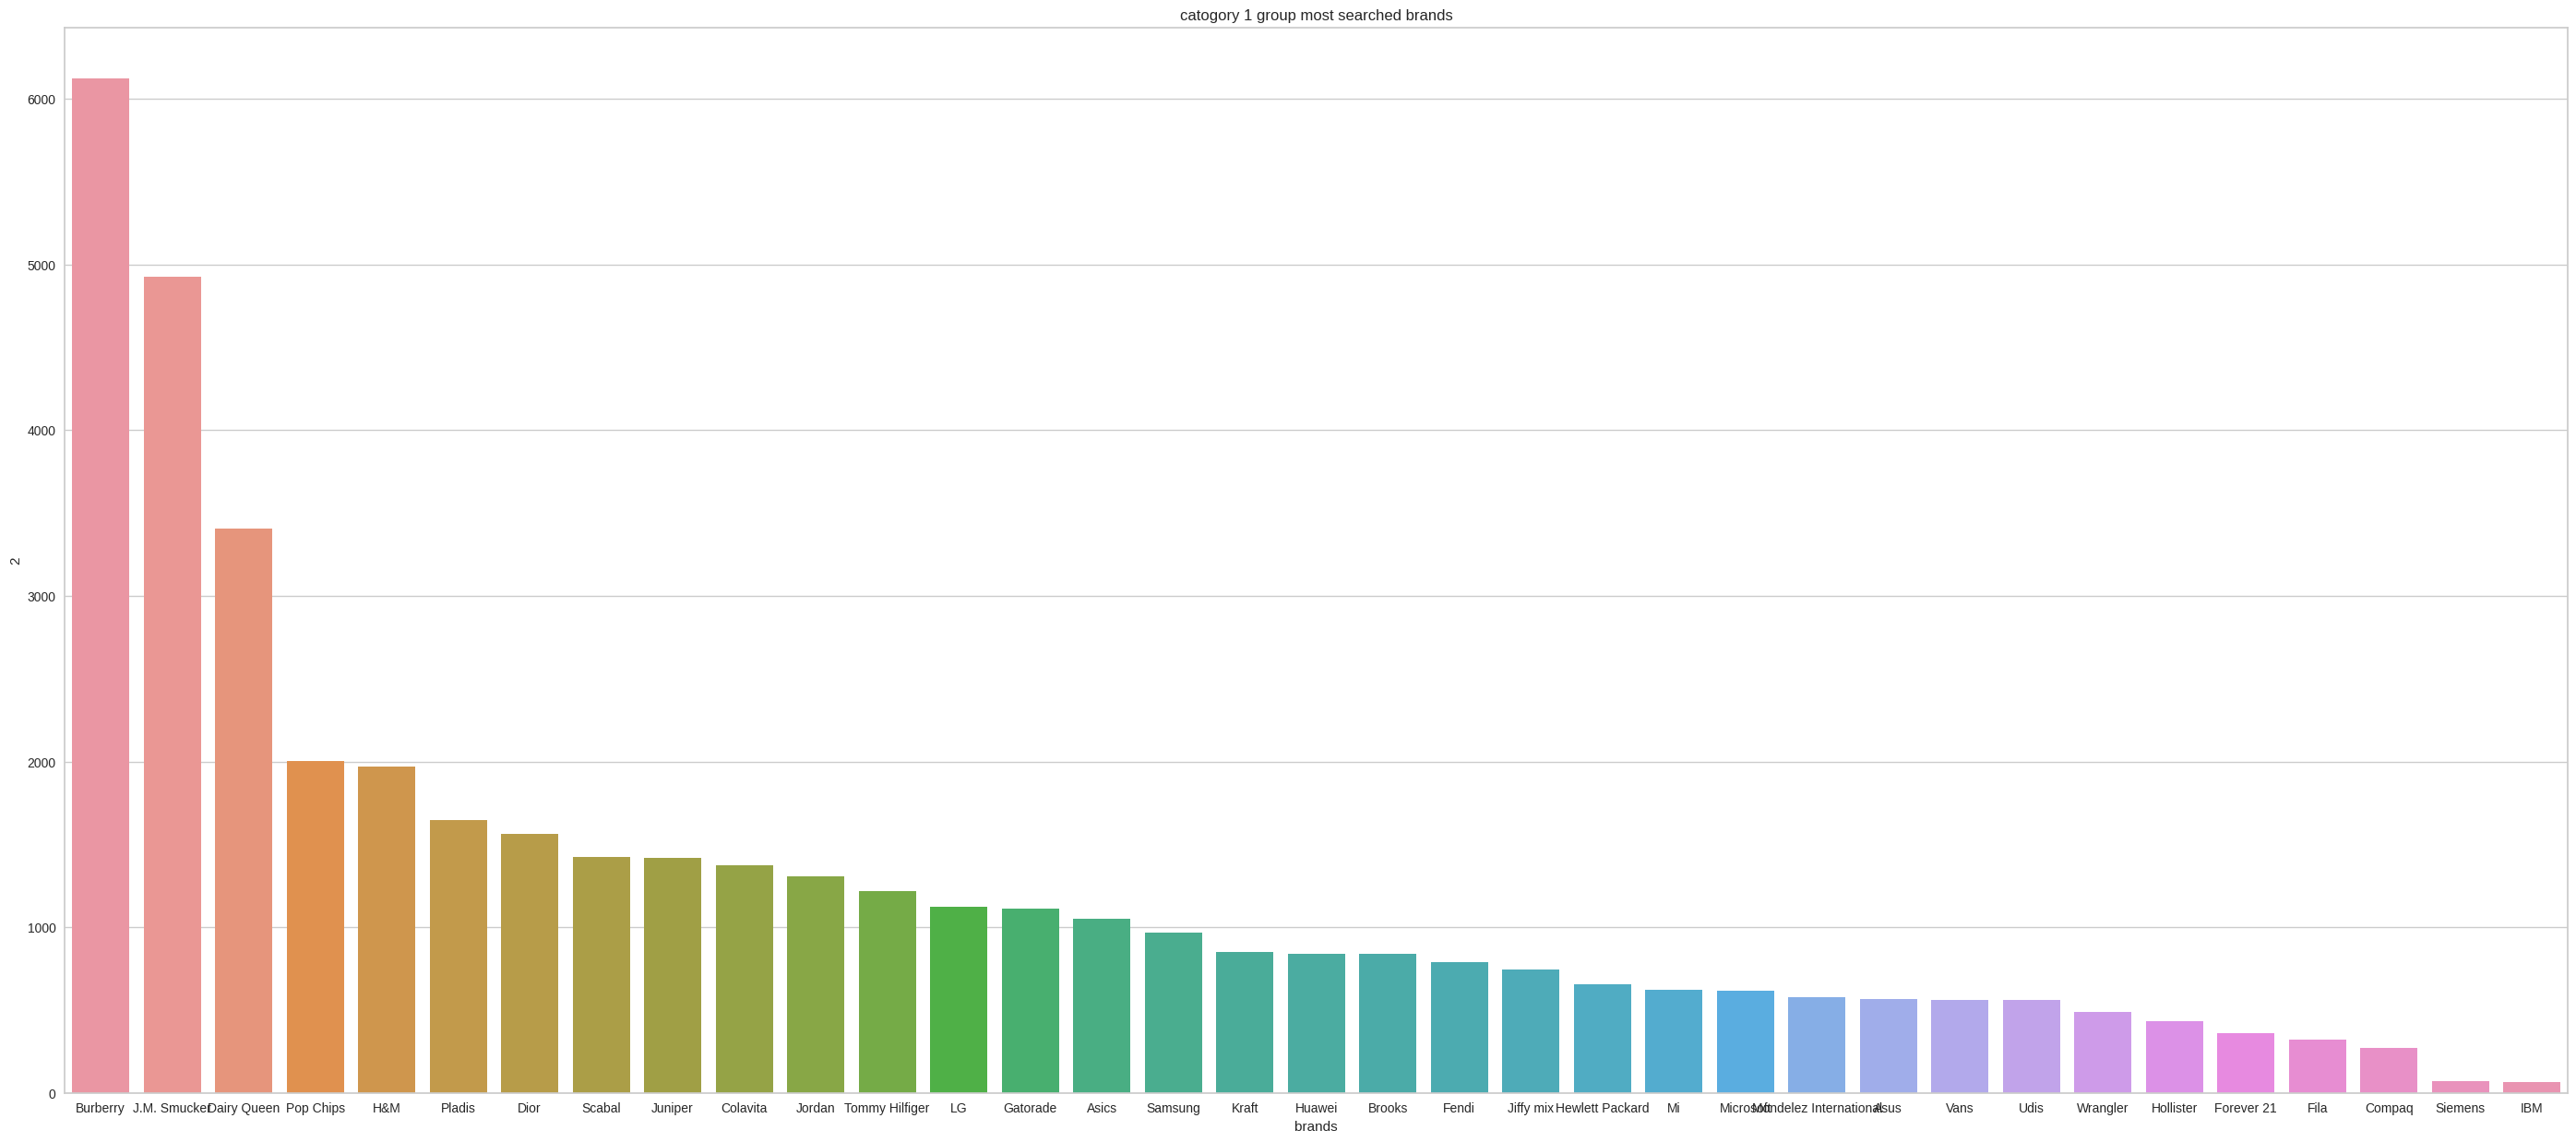

In [ ]:
plt.figure(figsize=(35,15))
sns.barplot(data=c,
            x='brands',
            y=2,
            order=c.sort_values(2,ascending = False).brands)
plt.title("catogory 1 group most searched brands")
plt.show()

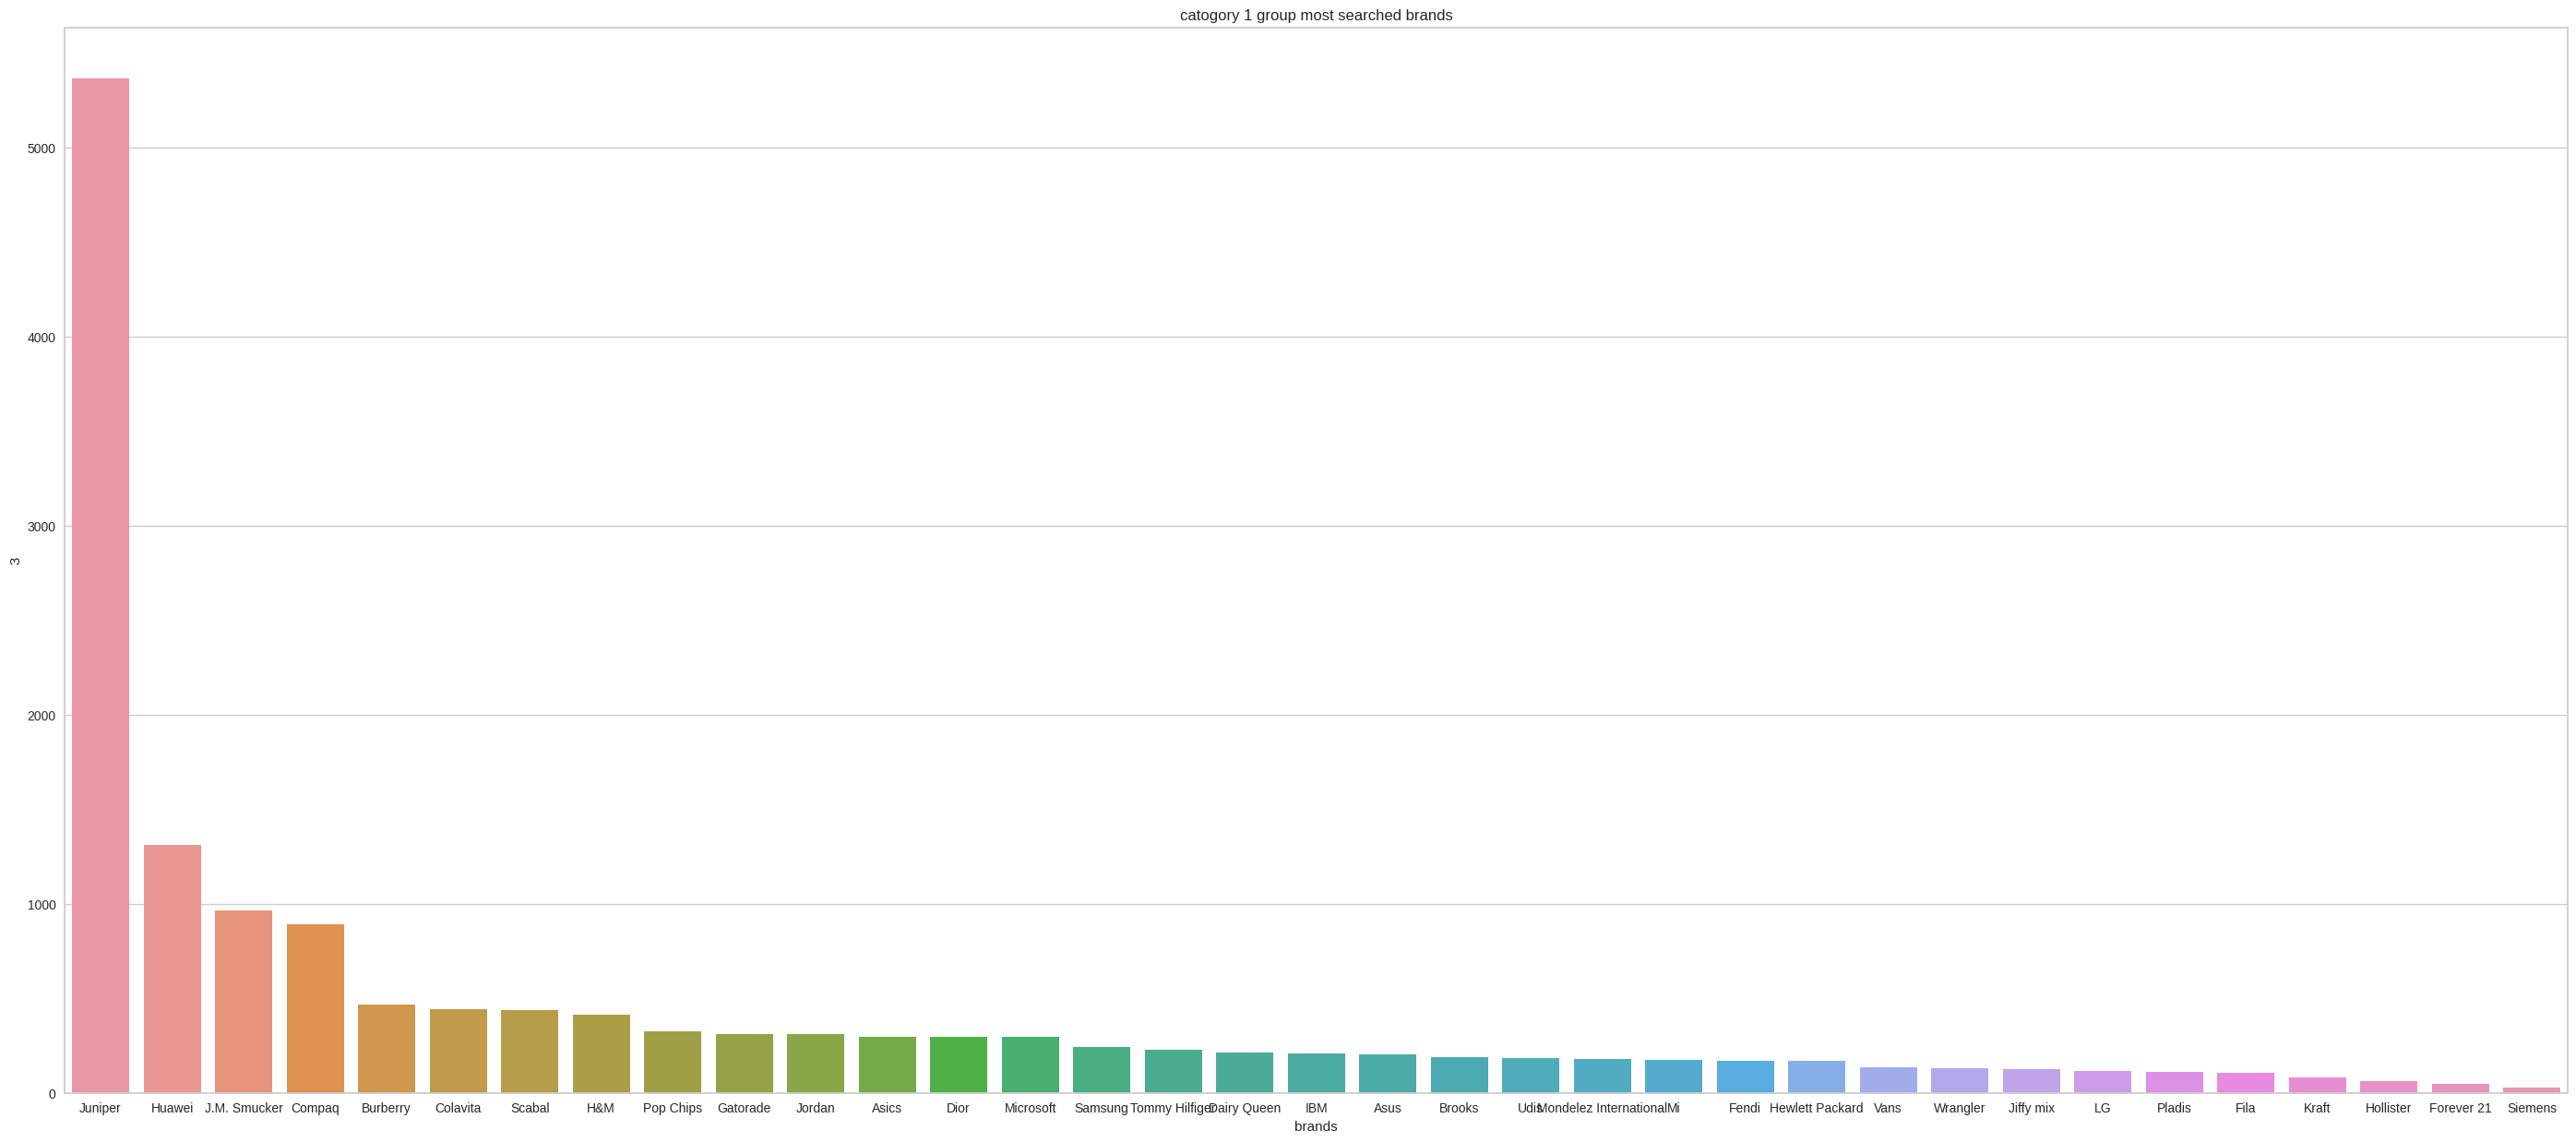

In [ ]:
plt.figure(figsize=(35,15))
sns.barplot(data=c,
            x='brands',
            y=3,
            order=c.sort_values(3,ascending = False).brands)
plt.title("catogory 1 group most searched brands")
plt.show()

In [ ]:
cat_brands=pd.DataFrame(c.sort_values(3,ascending=False))
cat_brands

brands_search_cat,brands,0,1,2,3
19,Juniper,6932,407,1421,5365
20,Huawei,5268,320,842,1310
17,J.M. Smucker,15501,1249,4928,966
21,Compaq,2266,132,272,893
23,Burberry,5915,332,6125,469
31,Colavita,3749,199,1376,442
27,Scabal,8932,310,1423,437
10,H&M,7150,313,1972,411
18,Pop Chips,4789,322,2003,323
1,Gatorade,5858,287,1112,313


## **Conclusion for grouping customers for mostly searched brands:**
*   category '0'__25987
*   category '1'__910
*   category '2'__2000
*   category '3'__1103
*   category 0 has 25987 customers mostly search brands like J.M. Smucker, Scabal, H&M, Juniper, Jordan and more
*   category 1 has 910 customers mostly search brands like Asics, J.M. Smucker, Siemens, Juniper, Burberry and more	
*   category 2 has 2000 customers mostly search brands like Burberry, J.M. Smucker, Dairy Queen, Pop Chips, H&M and more
*   category 3 has 1103 customers mostly search brands like Juniper, Huawei, J.M.Smucker, Compaq, Burberry and more

## grouping customers with number of orders and total searches

In [ ]:
df3=df.copy()

In [ ]:
df3['total_searches']= df3.iloc[:,3:].sum(axis=1)
df3=df3.drop(['Cust_ID','Gender'],axis=1)
df3=df3.drop(df3.loc[:, 'Jordan':'Kraft'].columns, axis=1)
df3.head()

,Orders,total_searches
0,7,2
1,0,18
2,7,5
3,0,2
4,10,16


In [ ]:
#Silhouette analysis
x=df3.values
silhouette_avg = []
for n in range(2,10):
  cluster_labels=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  cluster_labels=cluster_labels.fit_predict(x)
  silhouette_avg.append(silhouette_score(x,cluster_labels))

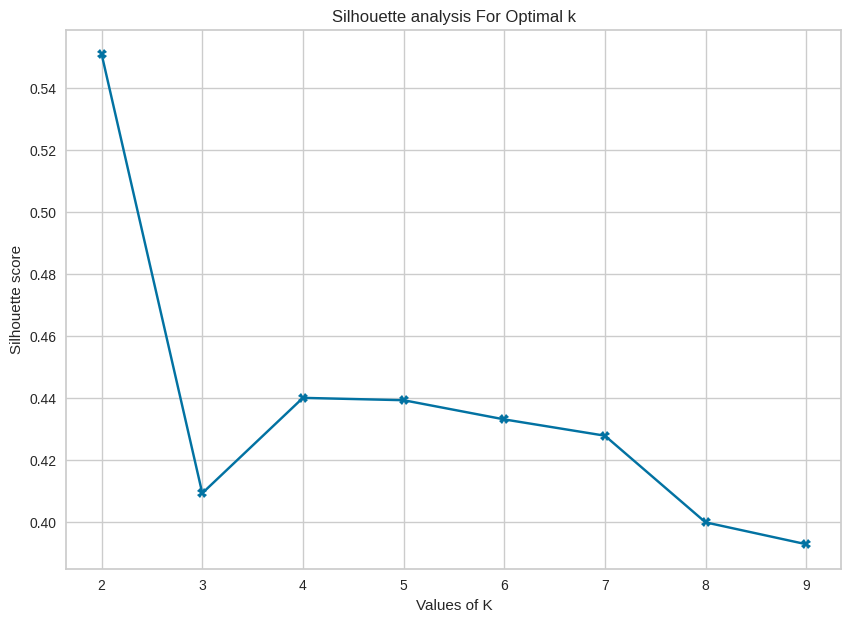

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(2,10),silhouette_avg,'bX-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [236]:
x=df3.values
inertia=[]
for n in range(1,10):
  algorithm=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  algorithm.fit(x)
  inertia.append(algorithm.inertia_)

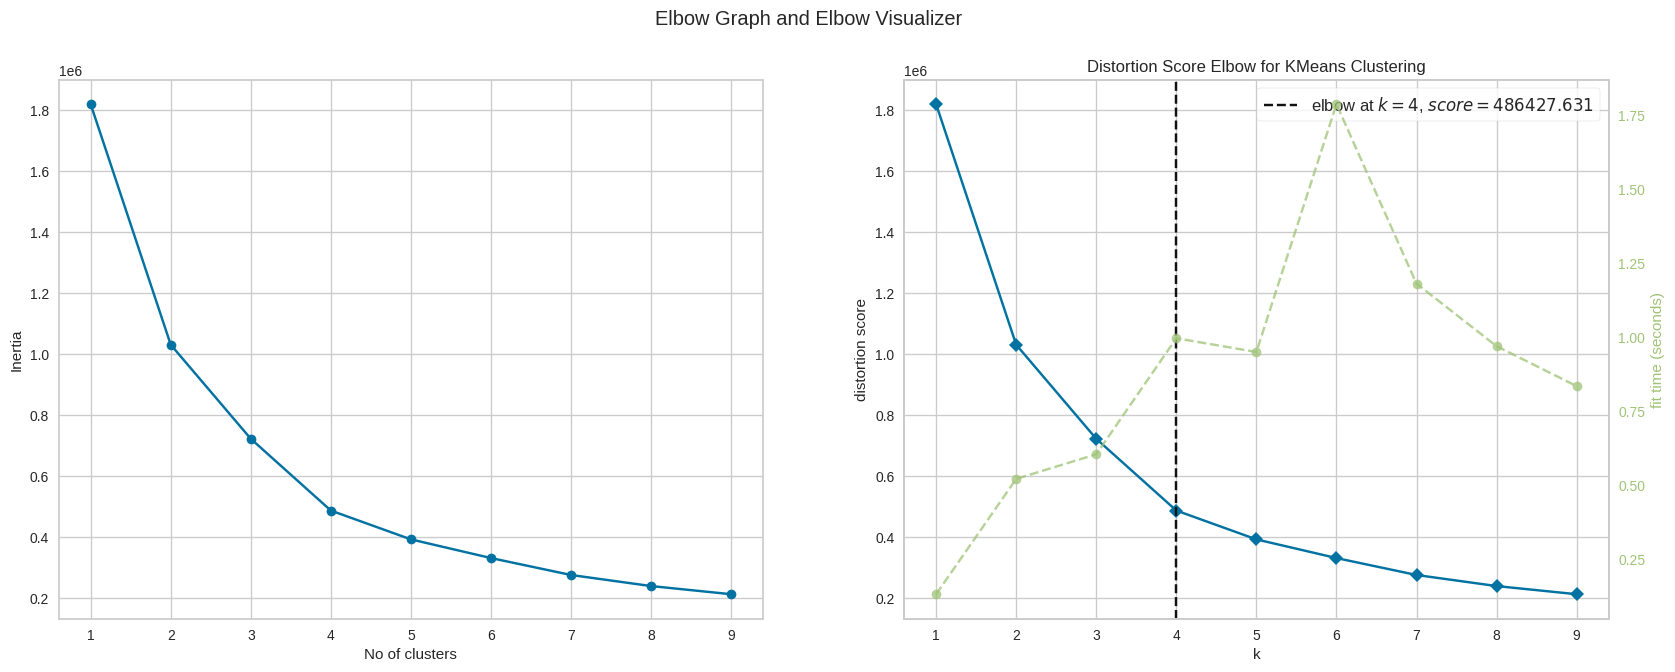

In [237]:
#elbow graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,10), inertia, 'bo-')
plt.xlabel('No of clusters'), plt.ylabel('Inertia')

#elbow visualizer
plt.subplot(1,2,2)
visualize = KElbowVisualizer(algorithm,k=(1,10))
visualize.fit(x)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()

In [224]:
algorithm=(KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=100,algorithm='elkan'))
algorithm.fit(x)
labels=algorithm.labels_
centroids=algorithm.cluster_centers_

y_kmeans=algorithm.fit_predict(x)
df3['order_search']=pd.DataFrame(y_kmeans)
df3.head()

,Orders,total_searches,order_search
0,7,2,0
1,0,18,1
2,7,5,0
3,0,2,3
4,10,16,1


In [231]:
cat = df3.groupby(['order_search'],as_index=False).median()
cat

,order_search,Orders,total_searches
0,0,8.0,4.0
1,1,4.0,13.0
2,2,4.0,28.0
3,3,1.0,4.0


In [238]:
px.bar(
    data_frame = cat,
    x = "order_search",
    y = ["total_searches","Orders"],
    
    orientation = "v",
    barmode = 'group',
    title='grouping customers with number of orders and total searches',
)

In [234]:
df3.groupby('order_search')['order_search'].count()

order_search
0     9969
1     6130
2      976
3    12925
Name: order_search, dtype: int64

## Conclusion for grouping customers with number of orders and total searches


*   Grouped to 1 categories
*   category '0' low searches and high orders 9969 customers
*   category '1' high searches and low orders 6130 customers
*   category '2' very high searches and low orders with 976 customers
*   category '3' low searches and low orders with 12925 customers 